In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

from arch import arch_model


In [3]:
df = yf.download("AAPL", start="2015-01-01", end="2023-01-01")

prices = df['Close']

returns = 100 * prices.pct_change().dropna()  # GARCH models use percent returns
returns.head()


C:\Users\siddh\AppData\Local\Temp\ipykernel_17988\3761023347.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("AAPL", start="2015-01-01", end="2023-01-01")
[*********************100%***********************]  1 of 1 completed


Ticker,AAPL
Date,
2015-01-05,-2.817196
2015-01-06,0.009417
2015-01-07,1.402277
2015-01-08,3.842191
2015-01-09,0.107259


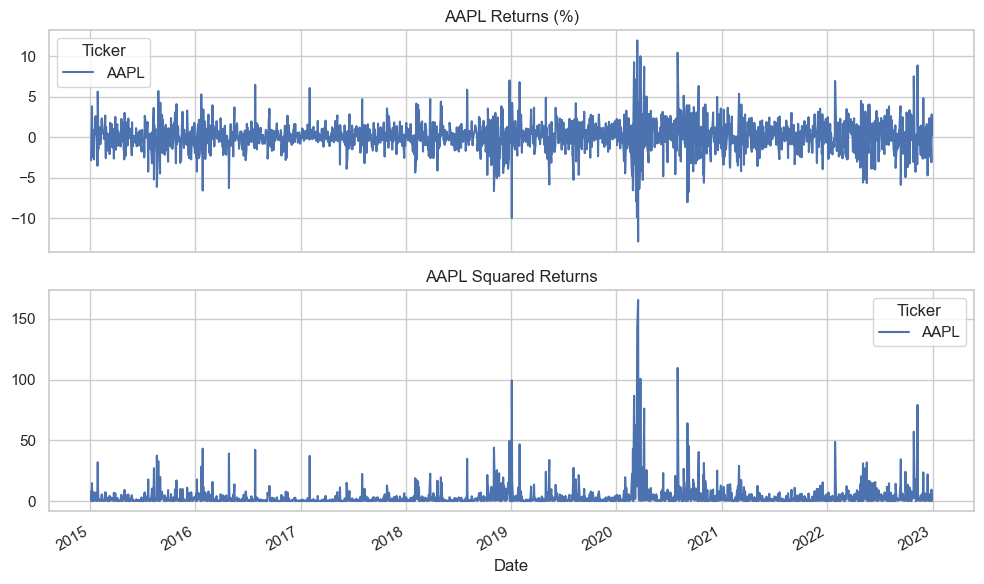

In [4]:
fig, ax = plt.subplots(2,1, figsize=(10,6), sharex=True)
returns.plot(ax=ax[0], title="AAPL Returns (%)")
(returns**2).plot(ax=ax[1], title="AAPL Squared Returns")
plt.tight_layout()
plt.show()


In [5]:
arch1 = arch_model(returns, vol='ARCH', p=1, o=0, q=0, dist='normal')
arch1_res = arch1.fit(disp='off')
print(arch1_res.summary())


                      Constant Mean - ARCH Model Results                      
Dep. Variable:                   AAPL   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -4061.04
Distribution:                  Normal   AIC:                           8128.07
Method:            Maximum Likelihood   BIC:                           8144.89
                                        No. Observations:                 2013
Date:                Sun, Dec 07 2025   Df Residuals:                     2012
Time:                        12:04:26   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1470  4.191e-02      3.509  4.504e-04 [6.490e-0

In [6]:
garch11 = arch_model(returns, vol='GARCH', p=1, o=0, q=1, dist='normal')
garch11_res = garch11.fit(disp='off')
print(garch11_res.summary())


                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   AAPL   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3919.32
Distribution:                  Normal   AIC:                           7846.63
Method:            Maximum Likelihood   BIC:                           7869.06
                                        No. Observations:                 2013
Date:                Sun, Dec 07 2025   Df Residuals:                     2012
Time:                        12:04:26   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.1783  3.721e-02      4.792  1.651e-06 [  0.105,  0.25

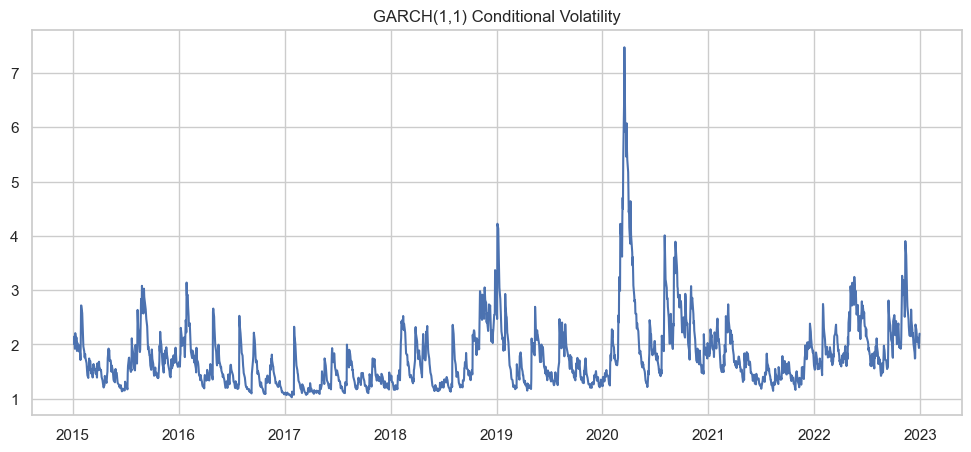

In [7]:
cond_vol = garch11_res.conditional_volatility

plt.figure(figsize=(12,5))
plt.plot(cond_vol)
plt.title("GARCH(1,1) Conditional Volatility")
plt.show()


In [8]:
forecast = garch11_res.forecast(horizon=30)

vol_forecast = forecast.variance.values[-1:]**0.5  # last row, sqrt variance
vol_forecast


array([[2.04712773, 2.04108861, 2.03529425, 2.02973535, 2.0244029 ,
        2.0192882 , 2.01438285, 2.00967873, 2.005168  , 2.00084309,
        1.99669672, 1.99272184, 1.98891167, 1.98525966, 1.9817595 ,
        1.97840514, 1.9751907 , 1.97211057, 1.96915933, 1.96633174,
        1.9636228 , 1.96102767, 1.95854172, 1.95616046, 1.95387961,
        1.95169505, 1.9496028 , 1.94759905, 1.94568015, 1.94384258]])

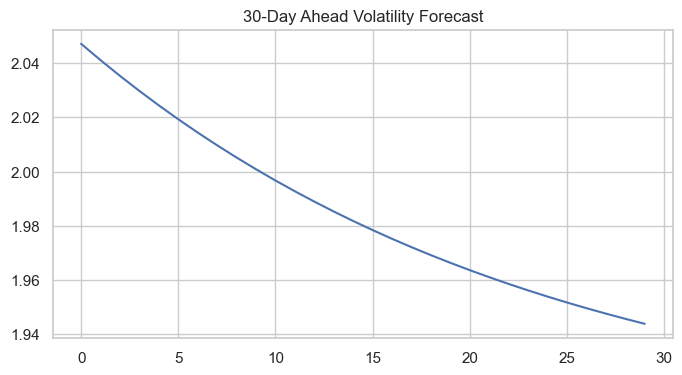

In [9]:
plt.figure(figsize=(8,4))
plt.plot(vol_forecast.T)
plt.title("30-Day Ahead Volatility Forecast")
plt.show()


In [10]:
print("ARCH(1) AIC:", arch1_res.aic)
print("GARCH(1,1) AIC:", garch11_res.aic)


ARCH(1) AIC: 8128.072458316798
GARCH(1,1) AIC: 7846.633681177954


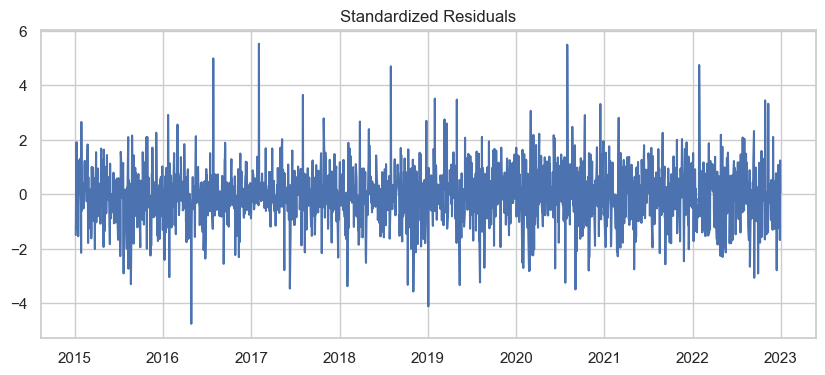

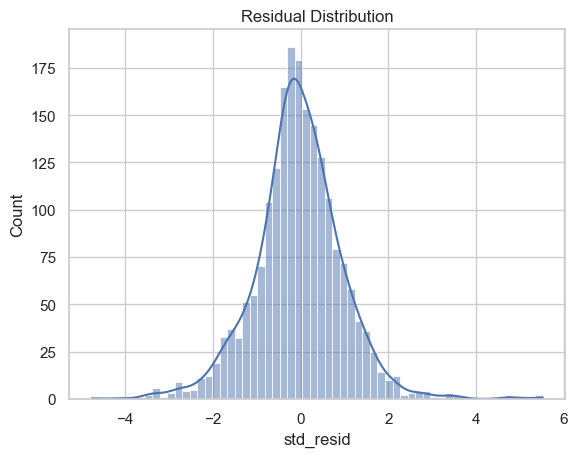

In [11]:
std_resid = garch11_res.std_resid

plt.figure(figsize=(10,4))
plt.plot(std_resid)
plt.title("Standardized Residuals")
plt.show()

sns.histplot(std_resid, kde=True)
plt.title("Residual Distribution")
plt.show()


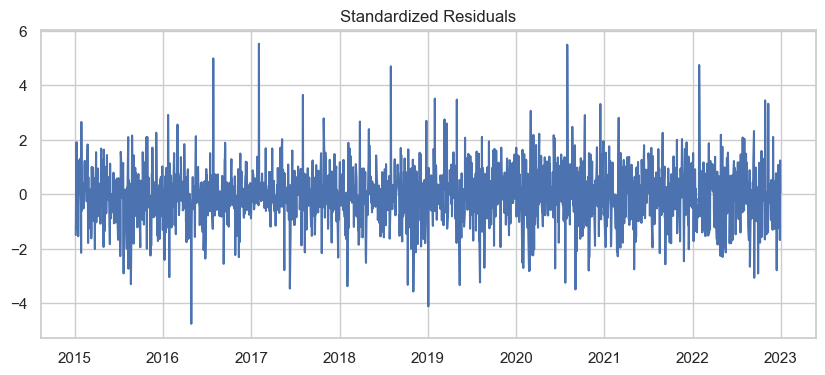

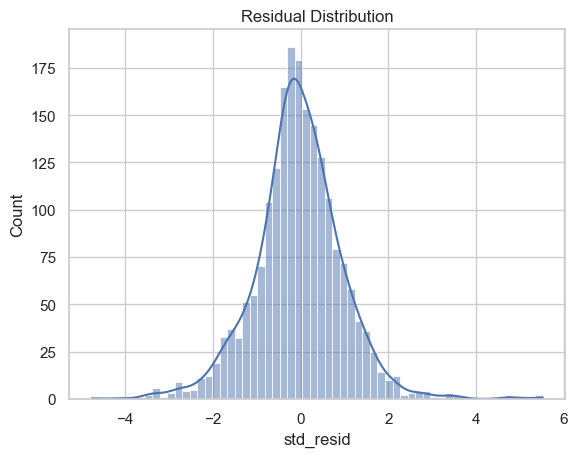

In [12]:
std_resid = garch11_res.std_resid

plt.figure(figsize=(10,4))
plt.plot(std_resid)
plt.title("Standardized Residuals")
plt.show()

sns.histplot(std_resid, kde=True)
plt.title("Residual Distribution")
plt.show()


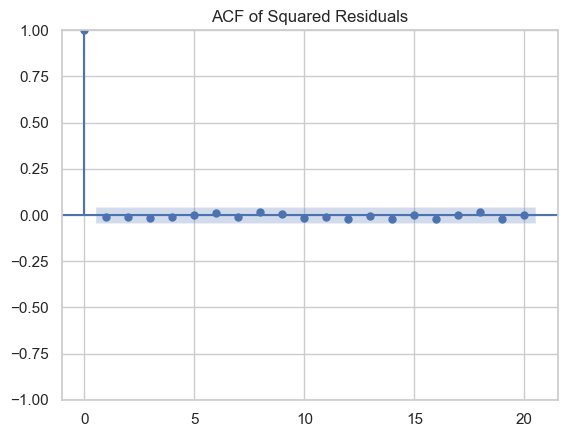

In [13]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(std_resid**2, lags=20)
plt.title("ACF of Squared Residuals")
plt.show()


In [14]:
garch_t = arch_model(returns, vol='GARCH', p=1, q=1, dist='t').fit(disp='off')
print(garch_t.summary())


                        Constant Mean - GARCH Model Results                         
Dep. Variable:                         AAPL   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -3836.16
Distribution:      Standardized Student's t   AIC:                           7682.32
Method:                  Maximum Likelihood   BIC:                           7710.36
                                              No. Observations:                 2013
Date:                      Sun, Dec 07 2025   Df Residuals:                     2012
Time:                              12:14:13   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu        

In [15]:
print(garch_t.aic)

7682.322868272479


In [16]:
garch_t1 = arch_model(returns, vol='GARCH', p=1, q=1, dist='normal').fit(disp='off')
print(garch_t1.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   AAPL   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3919.32
Distribution:                  Normal   AIC:                           7846.63
Method:            Maximum Likelihood   BIC:                           7869.06
                                        No. Observations:                 2013
Date:                Sun, Dec 07 2025   Df Residuals:                     2012
Time:                        12:24:25   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.1783  3.721e-02      4.792  1.651e-06 [  0.105,  0.25

In [17]:
print(garch_t1.aic)

7846.633681177954


In [18]:
gjr = arch_model(returns, vol='GARCH', p=1, o=1, q=1, dist='normal').fit(disp='off')
print(gjr.summary())


                   Constant Mean - GJR-GARCH Model Results                    
Dep. Variable:                   AAPL   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -3892.80
Distribution:                  Normal   AIC:                           7795.61
Method:            Maximum Likelihood   BIC:                           7823.64
                                        No. Observations:                 2013
Date:                Sun, Dec 07 2025   Df Residuals:                     2012
Time:                        12:25:56   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1246  3.435e-02      3.626  2.882e-04 [5.722e-0